In [1]:
import pickle
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load
with open('./Data/df_brand_result_alpha.pickle', 'rb') as f:
    df = pickle.load(f)

In [3]:
# remove brand attr is empty
df = df[~(df['Attribute_Freq15_w2v_name'].apply(len)==0)].reset_index(drop=True)

In [4]:
## compute average word vector
df['average_word2vec'] = [np.mean(row, axis=0) for row in df['Attribute_Freq15_w2v_vec']]

In [5]:
df.head()

,Brand_Name,Attribute_Freq15,Attribute_Freq15_w2v_filter,Attribute_diff,Attribute_Freq15_w2v_name,Attribute_Freq15_w2v_vec,average_word2vec
0,TiMISA,"[鈦鍺, 專櫃, 百貨, 金屬, 手鍊, 推薦, 時尚, 戒指, 純鈦, 羽鈦, 美學, 飾...","[包裝, 美學, 金屬, 配飾, 導入, 代理, 紙袋, 造型, 珠寶, 手鍊, 戒指, 飾...","{羽鈦, 設計, 商品, 鈦鍺, 推薦, 純鈦, 產品, 臺灣}","[包裝, 美學, 金屬, 配飾, 導入, 代理, 紙袋, 造型, 珠寶, 手鍊, 戒指, 飾...","[[0.641304, 0.234804, 0.285868, -0.322467, 0.0...","[0.22877827, 0.42080894, 0.18626395, -0.176455..."
1,東立,"[出版社, 汽車, 發展, 產品, 服務, 東立, 中國, 國際, 設計, 全球, 成立, ...","[國際, 有限公司, 核心, 讀者, 策略, 小說, 東立, 發展, 打造, 文化, 出版,...","{企業, 設計, 商品, 服務, 全球, 公司, 汽車, 成立, 產品, 心目中}","[國際, 有限公司, 核心, 讀者, 策略, 小說, 東立, 發展, 打造, 文化, 出版,...","[[0.040057, 0.262818, 0.48597, -0.35235, -0.17...","[0.06360267, 0.45064825, 0.20490311, -0.287164..."
2,ONEY 歐妮,"[版型, 外套, 風衣, 歐妮, 名稱, 現貨, 推薦, 上衣, 背心, 對象, 族群, 洋...","[外套, 女裝, 尺寸, 版型, 上衣, 對象, 時尚, 名稱, 風衣, 背心, 專櫃, 洋...","{設計, 商品, 歐妮 , 歐妮, 推薦, 現貨}","[外套, 女裝, 尺寸, 版型, 上衣, 對象, 時尚, 名稱, 風衣, 背心, 專櫃, 洋...","[[0.382115, 0.746203, 0.322536, -0.102699, -0....","[0.29367846, 0.43425146, 0.25098908, -0.215390..."
3,KissXXX,"[時尚, 設計, 材質, 名稱, 經典, 推薦, 女鞋, 拼接, 真皮, 顏色, 女性, 款...","[短靴, 尖頭, 顏色, 質感, 氣質, 鞋面, 高跟鞋, 皮革, 款式, 方頭, 休閒鞋,...","{帆布, 設計, 商品, 推薦, 姿態, 材質, 效果, 女性, 名稱, 系列, 穿搭}","[短靴, 尖頭, 顏色, 質感, 氣質, 鞋面, 高跟鞋, 皮革, 款式, 方頭, 休閒鞋,...","[[0.236162, 0.846489, 0.28639, -0.423461, -0.0...","[0.078890786, 0.49683163, 0.19660878, -0.27269..."
4,必翔銀髮樂活館,"[全方位, 產品, 輔具, 通路商, 必翔, 照護, 臺灣, 名稱, 市場, 銀髮, 樂活館...","[照護, 類別, 藥品, 產地, 生活館, 輔助, 事業, 生活, 門市, 醫材, 調整, ...","{設計, 市場, 商品, 服務, 推薦, 全球, 材質, 公司, 旗下, 樂活館, 產品, ...","[照護, 類別, 藥品, 產地, 生活館, 輔助, 事業, 生活, 門市, 醫材, 調整, ...","[[0.120132, 0.366806, 0.134058, 0.092247, -0.2...","[0.19221896, 0.33827958, 0.17991517, -0.040666..."


因為餘弦值的範圍是[-1,+1]，把相似度計算時一般需要值歸一化到[0,1]，一般通過右方公式： sim = 0.5 + 0.5 * cosθ

In [6]:
def _cosine_similarity(x, y):
    return 0.5 + 0.5 * cosine_similarity(x, y)

In [7]:
X = Y = df['average_word2vec'].tolist()
cos_sim_matrix = _cosine_similarity(X, Y)

In [8]:
cos_sim_matrix[1][0]

0.758572

In [9]:
cos_sim_matrix

array([[1.        , 0.758572  , 0.90703   , ..., 0.85344595, 0.8725451 ,
        0.84826905],
       [0.758572  , 1.        , 0.7439238 , ..., 0.7942368 , 0.73881257,
        0.7509302 ],
       [0.90703   , 0.7439238 , 0.99999994, ..., 0.8726629 , 0.93146497,
        0.90034205],
       ...,
       [0.85344595, 0.7942368 , 0.87266284, ..., 1.0000001 , 0.8837795 ,
        0.8852408 ],
       [0.8725451 , 0.73881257, 0.9314649 , ..., 0.8837795 , 0.9999999 ,
        0.9063518 ],
       [0.8482691 , 0.7509302 , 0.900342  , ..., 0.88524085, 0.90635175,
        1.        ]], dtype=float32)

In [10]:
col_id_li = df['Brand_Name'].tolist()
cos_sim_matrix = pd.DataFrame(cos_sim_matrix, columns=col_id_li).set_index(pd.Index(col_id_li))

In [11]:
cos_sim_matrix

,TiMISA,東立,ONEY 歐妮,KissXXX,必翔銀髮樂活館,Mirabelle,ECOVER 宜珂,THREE,Song Baby,H&D,...,ROYALLIN 蘿林嚴選,E.dot,十田,Just Gold 鎮金店,SOL,Discovery Adventures,MILDS 曼思,Batiste,SARLEE 沙麗,凱芮絲
TiMISA,1.000000,0.758572,0.907030,0.907102,0.824704,0.916699,0.846956,0.885779,0.762697,0.856181,...,0.912060,0.708097,0.832849,0.960245,0.796940,0.854392,0.888121,0.853446,0.872545,0.848269
東立,0.758572,1.000000,0.743924,0.738191,0.836014,0.782799,0.742616,0.807854,0.781171,0.819594,...,0.779368,0.748772,0.852376,0.784011,0.729621,0.860925,0.809067,0.794237,0.738813,0.750930
ONEY 歐妮,0.907030,0.743924,1.000000,0.933436,0.788747,0.887345,0.825329,0.859221,0.760539,0.864124,...,0.917719,0.684956,0.789521,0.886385,0.793589,0.839175,0.881329,0.872663,0.931465,0.900342
KissXXX,0.907102,0.738191,0.933436,1.000000,0.770844,0.911137,0.837978,0.890841,0.756170,0.849472,...,0.912980,0.684998,0.812345,0.893360,0.760739,0.843000,0.906805,0.873521,0.922754,0.887772
必翔銀髮樂活館,0.824704,0.836014,0.788747,0.770844,1.000000,0.792592,0.837702,0.861360,0.807453,0.829592,...,0.841690,0.738969,0.879205,0.804053,0.785263,0.851460,0.843982,0.827633,0.793946,0.814955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Discovery Adventures,0.854392,0.860925,0.839175,0.843000,0.851460,0.870804,0.830340,0.867486,0.774360,0.870790,...,0.882534,0.762748,0.868280,0.866683,0.811207,1.000000,0.885181,0.843441,0.846388,0.836464
MILDS 曼思,0.888121,0.809068,0.881329,0.906805,0.843982,0.877335,0.882332,0.936227,0.783614,0.877801,...,0.907052,0.732642,0.875585,0.879562,0.767939,0.885181,1.000000,0.912794,0.889594,0.887356
Batiste,0.853446,0.794237,0.872663,0.873521,0.827633,0.851744,0.880226,0.903247,0.776726,0.838925,...,0.879040,0.716879,0.839144,0.858884,0.759123,0.843441,0.912794,1.000000,0.883780,0.885241
SARLEE 沙麗,0.872545,0.738813,0.931465,0.922754,0.793946,0.859691,0.838541,0.868047,0.777534,0.840260,...,0.917149,0.716550,0.804487,0.859126,0.767238,0.846388,0.889594,0.883780,1.000000,0.906352


In [12]:
with open('./Data/cos_sim_matrix.json', 'w', encoding='utf-8') as file:
    cos_sim_matrix.to_json(file, force_ascii=False, orient = 'index')

In [13]:
klist = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
x = np.stack(df['average_word2vec'], axis=0)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in klist]
inertias = [model.inertia_ for model in kmeans_per_k]

In [14]:
inertias

[4545.9736328125,
 4399.4990234375,
 4253.6806640625,
 4140.55078125,
 4056.12646484375,
 3971.3779296875,
 3896.86376953125,
 3825.01416015625,
 3771.092041015625,
 3738.291015625,
 3675.10107421875,
 3636.546875]

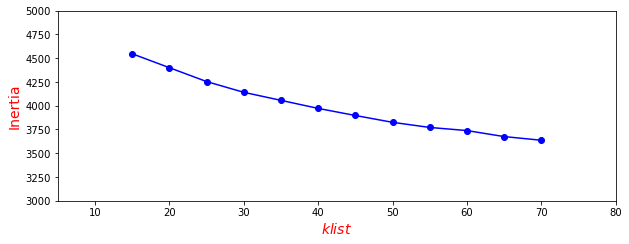

In [15]:
plt.figure(figsize=(10, 3.5))
plt.plot(klist,inertias, "bo-")
plt.xlabel("$klist$", fontsize=14,color='red')
plt.ylabel("Inertia", fontsize=14,color='red')
plt.axis([klist[0]-10, klist[-1]+10, 3000, 5000])

plt.show()

In [16]:
k = 70
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_pred = kmeans.fit_predict(x)

In [17]:
kmeans.inertia_

3636.546875

In [18]:
kmeans.cluster_centers_

array([[ 0.07254556,  0.45882893,  0.24858114, ...,  0.17325972,
        -0.0585449 ,  0.12083411],
       [ 0.14560023,  0.45855978,  0.11084093, ...,  0.28385565,
         0.01130423,  0.3069648 ],
       [ 0.23185696,  0.41985777,  0.17958279, ...,  0.02731491,
         0.04282061,  0.12154806],
       ...,
       [ 0.0603705 ,  0.33570123,  0.07927875, ...,  0.32677764,
         0.12110963,  0.24568062],
       [ 0.10523529,  0.44066823,  0.28005296, ...,  0.17343244,
        -0.12484547,  0.1432346 ],
       [ 0.08086786,  0.40802526,  0.25661775, ...,  0.11419491,
        -0.06642363,  0.19978899]], dtype=float32)

In [19]:
kmeans.labels_

array([35, 13, 10, ...,  9, 55, 26])

In [20]:
df['group'] = kmeans.labels_

In [21]:
by_group = df.groupby('group').size().reset_index(name='count').sort_values(by='count', ascending=False)

In [22]:
by_group.head(25)

,group,count
0,0,100
56,56,94
11,11,88
49,49,86
14,14,86
6,6,86
46,46,81
35,35,81
38,38,80
48,48,80


In [23]:
final_df = df.query("group in [59, 61, 57]")\
             .drop(['Attribute_Freq15', 'Attribute_Freq15_w2v_filter', 'Attribute_diff', 'Attribute_Freq15_w2v_vec'], axis=1)\
             .reset_index(drop=True)

In [24]:
with open('./Data/knoledge_graph_data.json', 'w', encoding='utf-8') as file:
    final_df.to_json(file, force_ascii=False, orient = 'records')

In [25]:
final_df

,Brand_Name,Attribute_Freq15_w2v_name,average_word2vec,group
0,KissXXX,"[短靴, 尖頭, 顏色, 質感, 氣質, 鞋面, 高跟鞋, 皮革, 款式, 方頭, 休閒鞋,...","[0.078890786, 0.49683163, 0.19660878, -0.27269...",61
1,NIKE 耐吉,"[耐吉, 慢跑鞋, 耐克, 運動, 籃球鞋, 運動鞋, 男鞋, 體育, 行銷, 鞋款, 服飾...","[0.25121313, 0.49815726, 0.18997276, -0.183825...",61
2,eyah 宜雅,"[純色, 雙人, 製造, 枕套, 被套, 單人, 商城, 枕頭, 纖維, 雙人床, 評價, ...","[0.029829273, 0.4029305, 0.17698006, -0.107716...",57
3,ISHUR 伊舒爾,"[高度, 枕套, 包覆, 網路, 規格, 床墊, 雙人, 單人, 枕頭, 涼蓆, 評價, 加...","[0.047591295, 0.39190605, 0.17163347, -0.10447...",57
4,BELLE VIE,"[雙人, 棉被, 被套, 製造, 單人, 加大, 名稱, 寢具, 任選, 黃色, 臺灣, 床...","[0.015816009, 0.38298696, 0.1087512, -0.093291...",57
...,...,...,...,...
198,HO KANG,"[傢俱, 卡通, 寢飾, 物業, 雙人, 單人, 枕頭, 嬰兒, 購買, 管理, 類型, 尺...","[0.087314785, 0.43361774, 0.202245, -0.1018633...",57
199,DIN.Y,"[商店, 韓國, 鞋面, 高跟鞋, 皮革, 方式, 休閒鞋, 拖鞋, 真皮, 臺灣, 涼鞋,...","[0.16110209, 0.38938355, 0.13758671, -0.164862...",61
200,nono house,"[種類, 網友, 總覽, 規格, 仕女, 鞋面, 版型, 選購, 尺寸, 休閒鞋, 鞋子, ...","[0.23954068, 0.39861804, 0.13571177, -0.209547...",61
201,貝兒居家寢飾生活館,"[傢俱, 生活館, 床墊, 寢飾, 貝兒, 雙人, 單人, 加大, 纖維, 臺灣, 床罩, ...","[0.07059682, 0.36850137, 0.1589149, -0.0822963...",57
